# Error Mitigation through ancillas

Since parity and total magnetisation is conserved during time evolution, one can use the four free ancillas to check if data does not conserve these quantities.
Here the list of check-circuit that we test:
* Copy check
* Parity Check
* Magnetization Check


## Copy Check
Here is the circuit of copy check (label of the qubits same as in jakarta):



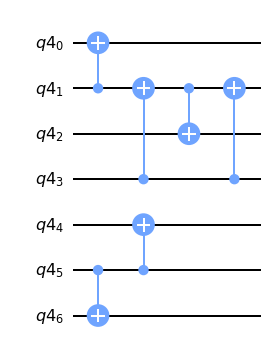

In [8]:
qr=QuantumRegister(7)
qc=QuantumCircuit(qr)

qc.cx(qr[1],qr[0])
qc.cx(qr[5],qr[6])
qc.cx(qr[5],qr[4])
qc.cx(qr[3],qr[1])
qc.cx(qr[1],qr[2])
qc.cx(qr[3],qr[1])

qc.draw(output='mpl')

### Description
In this circuit the states of the control qubits are copied on the ancillas, since the magnetization is preserved if we measure on the ancillas a state that does not preserve this quantity the measurement is discarded. 
In addition to this on qubit 5 there are two c-not instead of one (one on ancilla 4 and one on 6), so if the states of ancilla 4 and 6 are different we discard the measurement (they should have the same state). \
To sum up, these are the condition that ancillas have to pass in order to keep the measurement:

* ancillas order = [6,4,2,0]
* ancillas conditions = |1110>;|1101>;|0011>

The qubits used to simulate the Hamiltonian has to be measured before ancillas in order to not interfere with time evolution.



## Parity Check
We have two different circuit for parity check: 








### Parity check one ancilla 

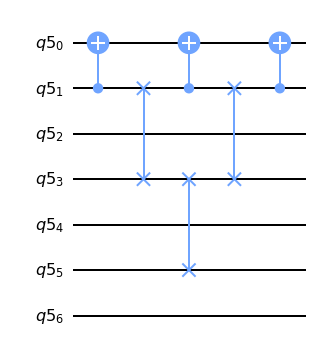

In [9]:
qr=QuantumRegister(7)
qc=QuantumCircuit(qr)

qc.cx(qr[1],qr[0])
qc.swap(qr[1],qr[3])
qc.cx(qr[1],qr[0])
qc.swap(qr[5],qr[3])
qc.swap(qr[1],qr[3])
qc.cx(qr[1],qr[0])
qc.draw(output='mpl')

### Description 
The state of the ancilla is the parity of the sistem (|0> if the number of 1 is even and |1> if is odd), in our case the parity is 0 so if the measure of the ancilla gives |1> we discard the data. \
The ancilla can be measure before the measurement of qubits used to simulate the Hamiltonian. \
Due to the geometry of Jakarta we need to introduce three SWAP gates that imply 9 c-not so this check is more likely subject to errors.


### Parity Check two ancillas

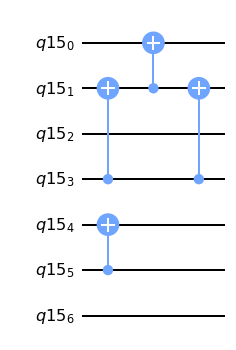

In [20]:
qr1=QuantumRegister(7)
qc=QuantumCircuit(qr1)
qc.cx(qr1[5],qr1[4])
qc.cx(qr1[3],qr1[1])
qc.cx(qr1[1],qr1[0])
qc.cx(qr1[3],qr1[1])
qc.draw(output='mpl')

### Description
With parity 0 (number of 1 even) the possible states of the ancillas are |00> or |11>.\
Qubits used to simulate the Hamiltonian must be measure before the ancillas but the lenght of the circuit is way shorter than the parity check circuit with one ancilla. \
Measuring something different from the possible state of the ancillas mean reject data



# Magnetization Check




Firstly we have to introduce che C-S (control-s) gate:

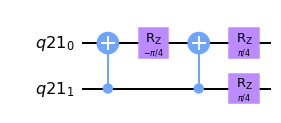

In [26]:
pi=np.pi
qr=QuantumRegister(2)
CS_qc=QuantumCircuit(qr,name='C-S')

CS_qc.cx(qr[1],qr[0])
CS_qc.rz(-pi/4,qr[0])
CS_qc.cx(qr[1],qr[0])
CS_qc.rz(pi/4,qr[0])
CS_qc.rz(pi/4,qr[1])


CS_qc.draw(output='mpl')

where qubit 1 is the control

Here magnetization check circuit:

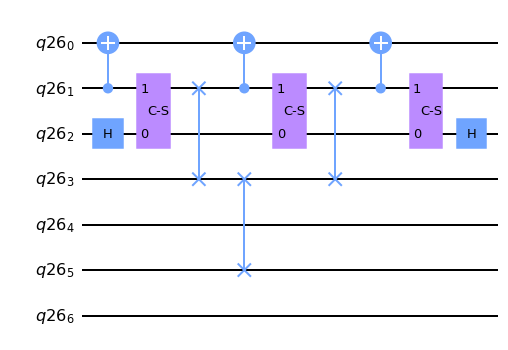

In [31]:
qr=QuantumRegister(7)
qc=QuantumCircuit(qr)

qc.h(qr[2])
qc.cx(qr[1],qr[0])
qc.append(CS_qc,[qr[2],qr[1]])
qc.swap(qr[1],qr[3])
qc.cx(qr[1],qr[0])
qc.append(CS_qc,[qr[2],qr[1]])
qc.swap(qr[5],qr[3])
qc.swap(qr[1],qr[3])
qc.cx(qr[1],qr[0])
qc.append(CS_qc,[qr[2],qr[1]])
qc.h(qr[2])
qc.draw(output='mpl')

### Description

Gives a magnetization check but only two ancillas are needed (instead of three with copy check) and ancillas can be measured before the measurement of time evolution qubits. \
Due to geometry of jakarta we need three swap gate to implement this check so the circuit is pretty long and likely subject to error (in particular compare to copy check circuit). \
In our case (magnetization=2) the ancilla condition is:

* ancilla order = [2,0]
* ancilla condition = |10>

